## Homo, LZD

C:\Users\zhijianh\AppData\Local\Temp/ipykernel_30008/3582822768.py:30: UserWarning: Matplotlib is currently using cairo, which is a non-GUI backend, so cannot show the figure.
  plt.show()


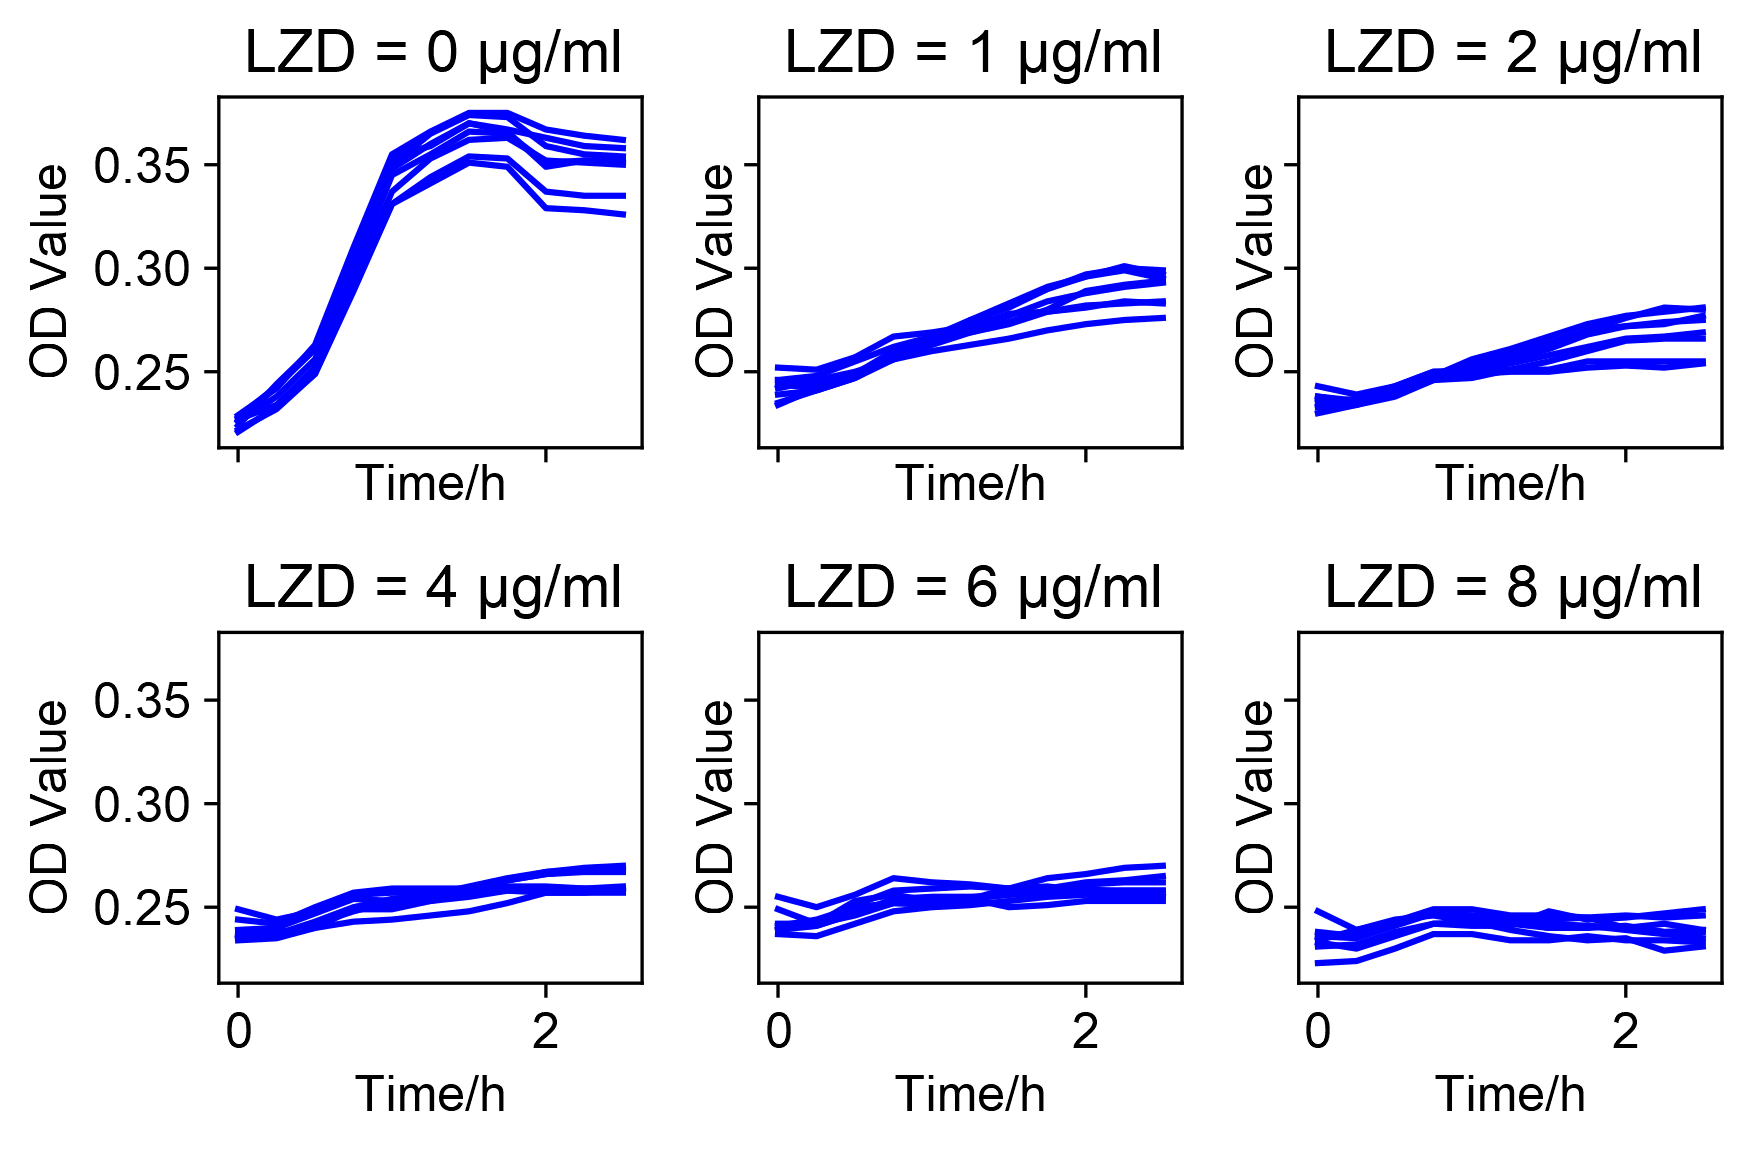

In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load processed data
with open("./LZD/ODs_time_homo.pkl", "rb") as f:
    data = pickle.load(f)

processed_ODs = data["processed_ODs"]
Ds = data["Ds"]
time_interval = data["time_interval"]

# Create subplots
fig, axes = plt.subplots(2, 3, dpi=300, sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Plot each OD series
for ax, OD, D in zip(axes, processed_ODs, Ds):
    for i in range(OD.shape[1]):
        ax.plot(np.arange(0, OD.shape[0]) * time_interval, OD[:, i], linestyle='-', color='b')

    ax.set_title(f'LZD = {D} µg/ml')  # Set title for each subplot

# Set common labels and show plot
for ax in axes:
    ax.set_xlabel('Time/h')
    ax.set_ylabel('OD Value')

plt.tight_layout()
plt.show()


## Hetero, LZD

### hetero, D=0, D=8ug/ml

C:\Users\zhijianh\AppData\Local\Temp/ipykernel_30008/1173606456.py:39: UserWarning: Matplotlib is currently using cairo, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Growth rate at LZD = 0 µg/ml: 0.1645
Growth rate at LZD = 8 µg/ml: 0.0724


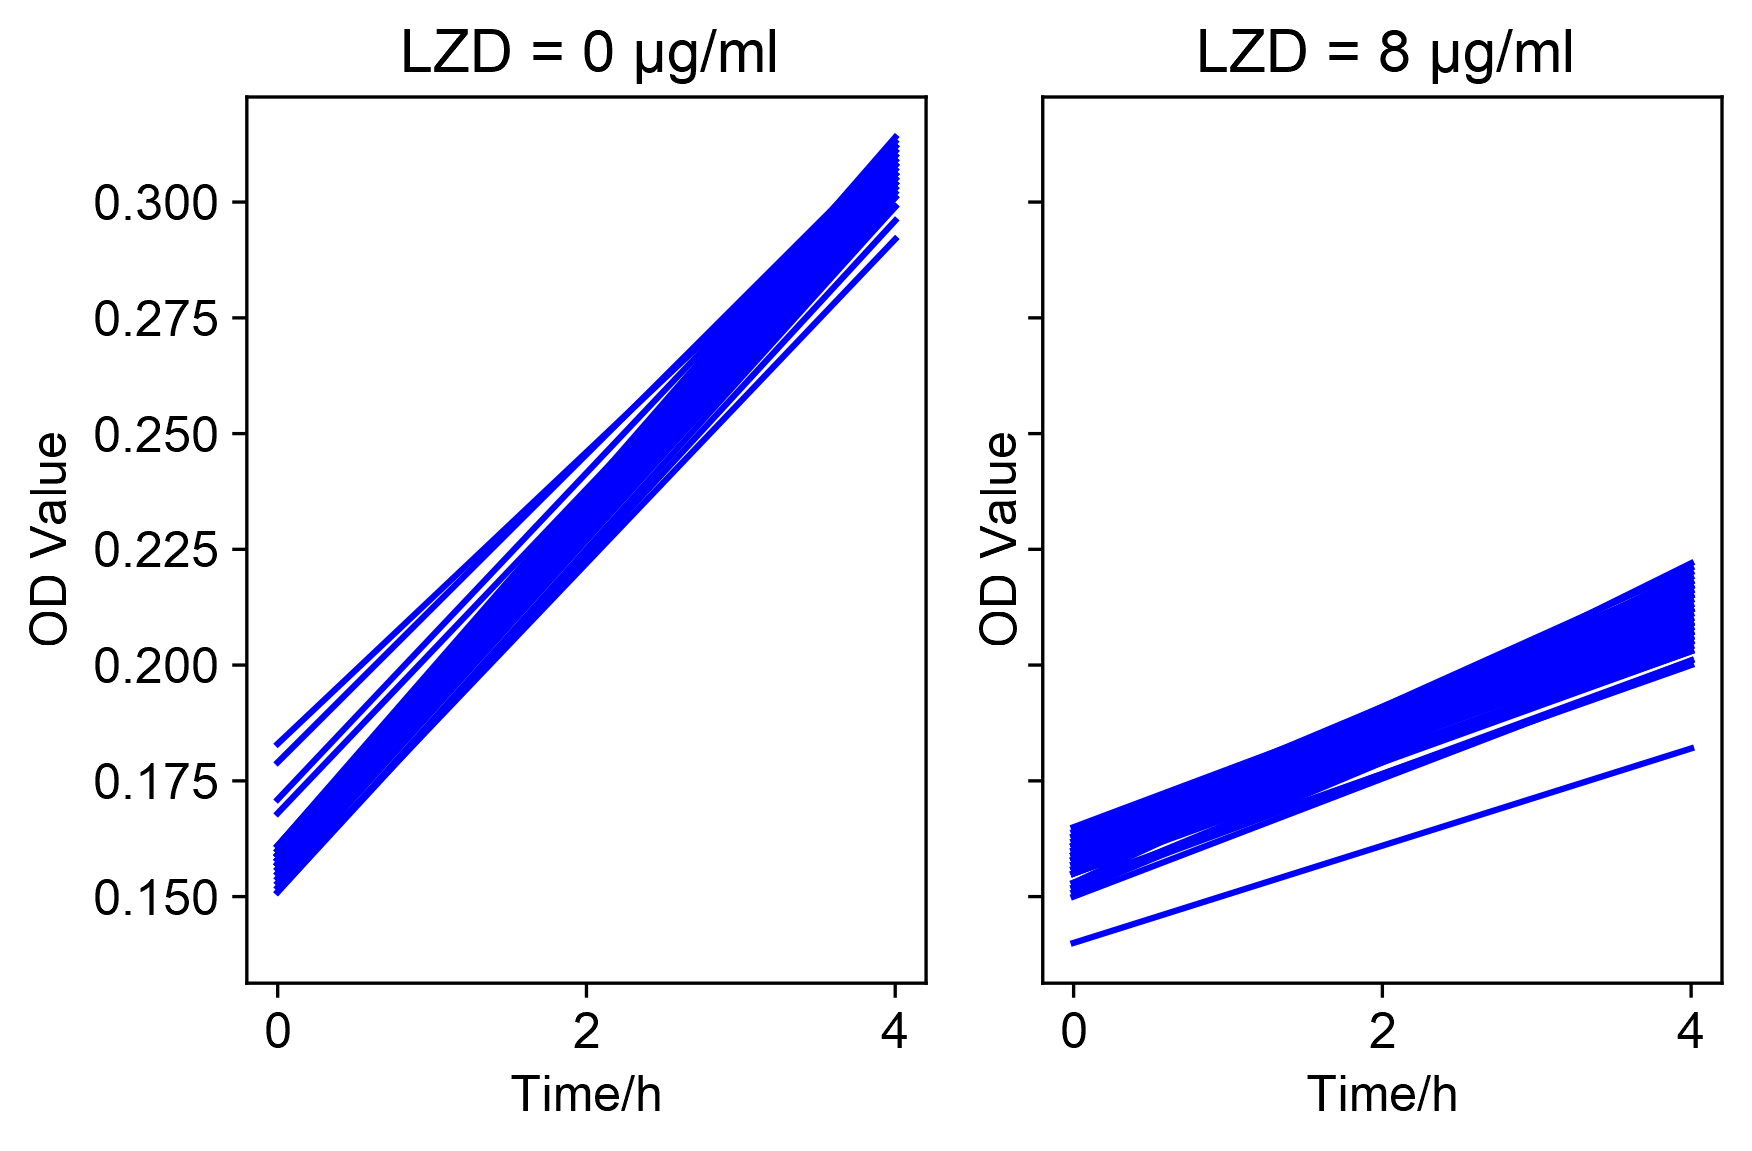

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

# Load processed data
with open("./LZD/ODs_endpoint_hetero.pkl", "rb") as f:
    data = pickle.load(f)

OD_T0_Endpoint_D0 = data["OD_T0_Endpoint_D0"]
OD_T0_Endpoint_D8 = data["OD_T0_Endpoint_D8"]

# Time points
time_points = [0, 4]

%matplotlib inline
matplotlib.use('Cairo')
plt.rc('font', family='arial')
plt.rcParams.update({'font.size': 12})
font = fm.FontProperties(family = 'arial')

# Create a single figure with two subplots
fig, ax = plt.subplots(1, 2, dpi=300, sharex=True, sharey=True)

# Plot for D=0
ax[0].plot(time_points, OD_T0_Endpoint_D0, linestyle='-', color='b')
ax[0].set_title('LZD = 0 µg/ml')
ax[0].set_xlabel('Time/h')
ax[0].set_ylabel('OD Value')

# Plot for D=8
ax[1].plot(time_points, OD_T0_Endpoint_D8, linestyle='-', color='b')
ax[1].set_title('LZD = 8 µg/ml')
ax[1].set_xlabel('Time/h')
ax[1].set_ylabel('OD Value')

plt.tight_layout()
plt.show()

# Compute Growth Rates
g_D0 = (np.log(OD_T0_Endpoint_D0[1, :] / OD_T0_Endpoint_D0[0, :]) / 4).mean()
g_D8 = (np.log(OD_T0_Endpoint_D8[1, :] / OD_T0_Endpoint_D8[0, :]) / 4).mean()

print(f"Growth rate at LZD = 0 µg/ml: {g_D0:.4f}")
print(f"Growth rate at LZD = 8 µg/ml: {g_D8:.4f}")


## periodic, AMP

C:\Users\zhijianh\AppData\Local\Temp/ipykernel_30008/1088351371.py:34: UserWarning: Matplotlib is currently using cairo, which is a non-GUI backend, so cannot show the figure.
  plt.show()


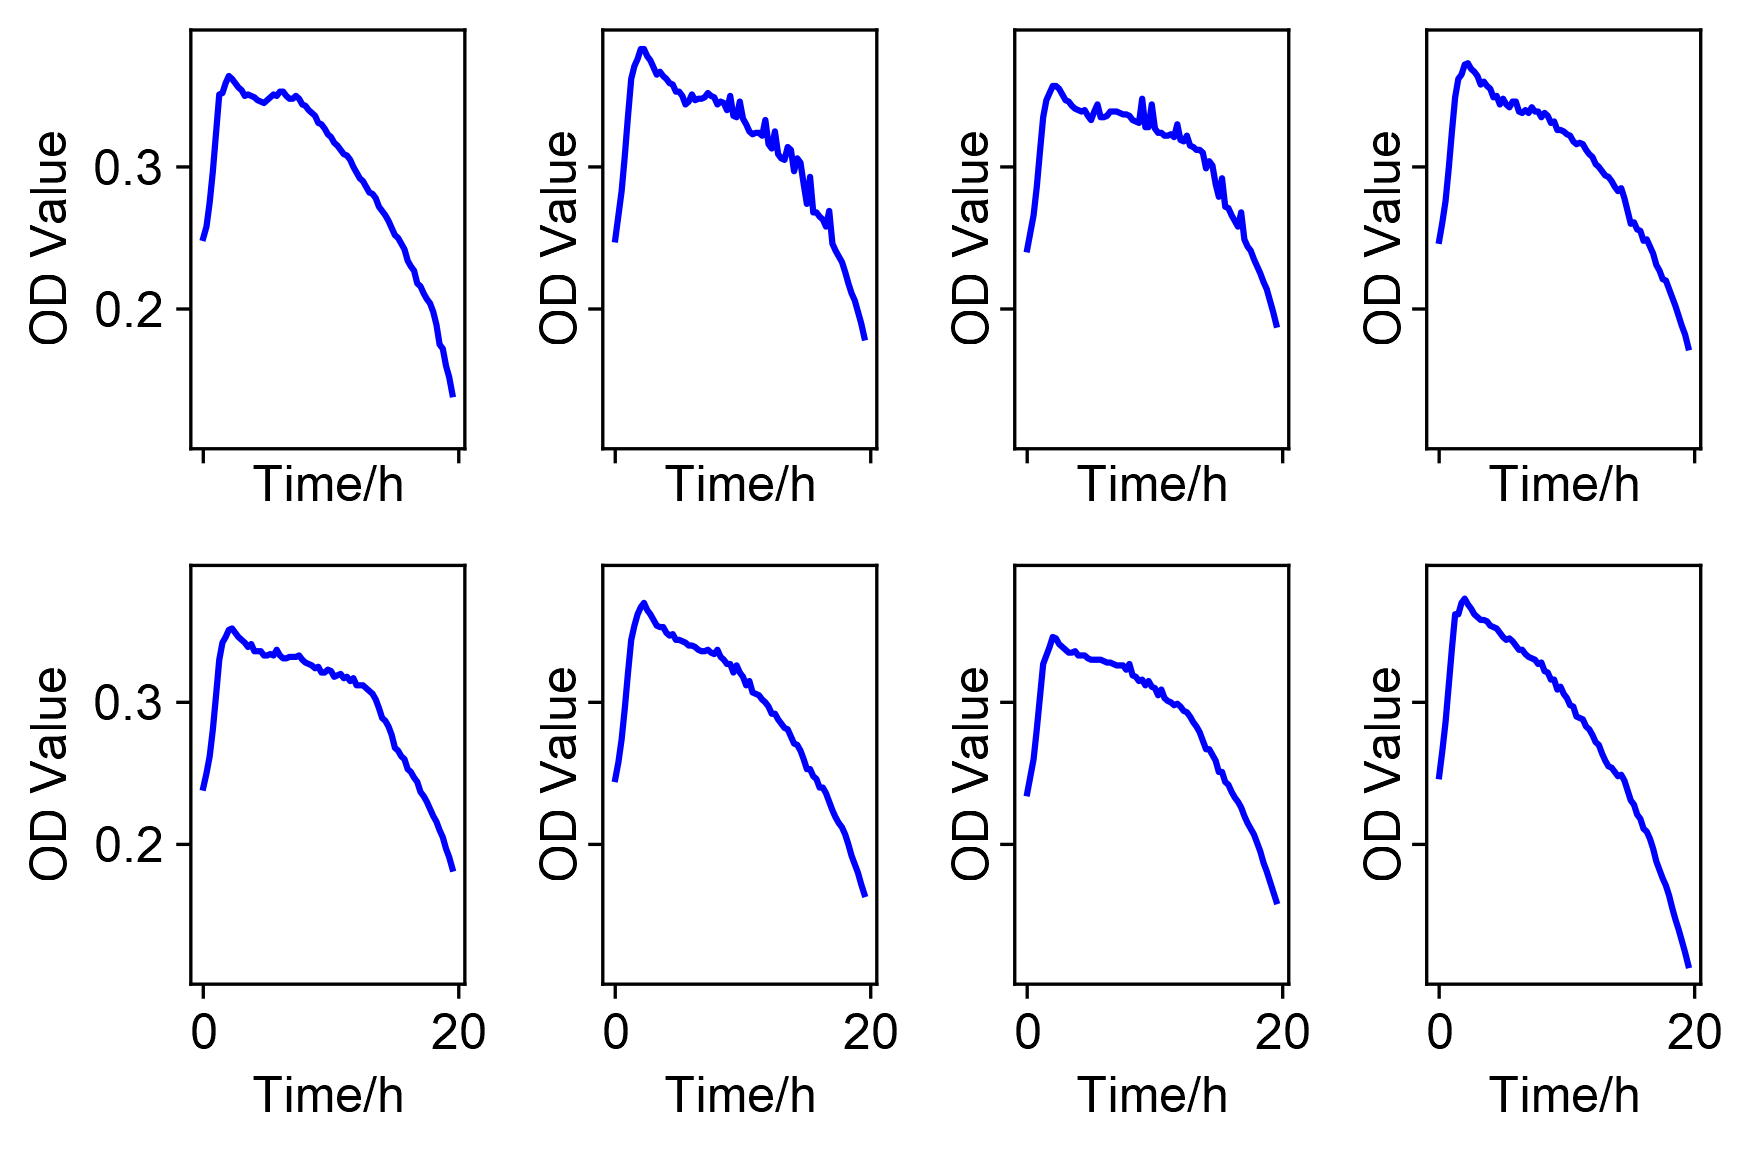

In [6]:
import numpy as np
###########################################
folder_path = "./AMP_Periodic/"
file_path = folder_path + "OD_growth_decay.npz"

# load OD_growth, OD_decay, t_c, time_interval from OD_growth_decay_D100_dilution_1_2.npz
data = np.load(file_path)
OD_growth, OD_decay, t_c, time_interval = data['OD_growth'], data['OD_decay'], data['t_c'], data['time_interval']

# Concatenate the arrays vertically
ODs = np.vstack((OD_growth, OD_decay))

# plot the ODs
# Create subplots
fig, axes = plt.subplots(2, 4, dpi=300, sharex=True, sharey=True)

# Flatten the 2D array of axes to 1D
axes = axes.flatten()

# Plot each OD series
for ax, OD in zip(axes, ODs.T):
    ax.plot(np.arange(0, OD.shape[0]) * time_interval, OD, 
            #marker='o', 
            linestyle='-', color='b')
    # plot t_c in a red vertical line
    #ax.axvline((t_c-2)*time_interval, color='red', linestyle='--')

# Set common labels and show plot
for ax in axes:
    ax.set_xlabel('Time/h')
    ax.set_ylabel('OD Value')

plt.tight_layout()
plt.show()

